In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("data.csv", encoding='latin1')  # or encoding='ISO-8859-1'
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Basic info
df.info()

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop rows with all missing values
df.dropna(how='all', inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Shape after cleaning
print("\nShape after cleaning:", df.shape)


<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB

Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

Shape after cleaning: (536641, 8)


In [ ]:
# Summary statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Specific statistics
print("Mean Quantity:", df['Quantity'].mean())
print("Median Quantity:", df['Quantity'].median())
print("Mode Quantity:", df['Quantity'].mode()[0])
print("Standard Deviation of Quantity:", df['Quantity'].std())

print("\nMean UnitPrice:", df['UnitPrice'].mean())
print("Median UnitPrice:", df['UnitPrice'].median())
print("Mode UnitPrice:", df['UnitPrice'].mode()[0])
print("Standard Deviation of UnitPrice:", df['UnitPrice'].std())

Mean Quantity: 9.620029032444409
Median Quantity: 3.0
Mode Quantity: 1
Standard Deviation of Quantity: 219.13015613097335

Mean UnitPrice: 4.632655674836623
Median UnitPrice: 2.08
Mode UnitPrice: 1.25
Standard Deviation of UnitPrice: 97.23311763773246


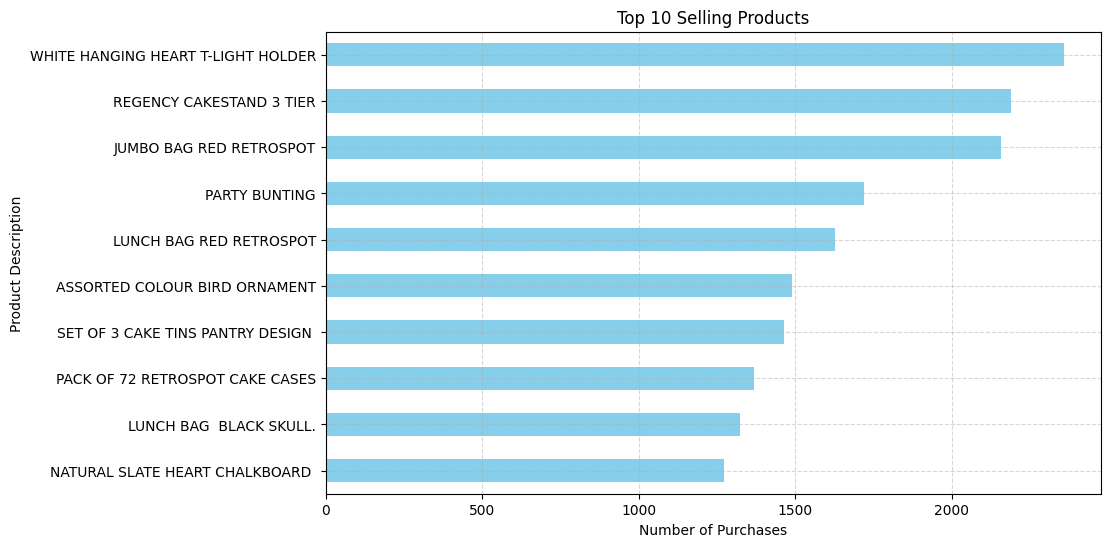

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 products
top_products = df['Description'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='barh', color='skyblue')
plt.title("Top 10 Selling Products")
plt.xlabel("Number of Purchases")
plt.ylabel("Product Description")
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

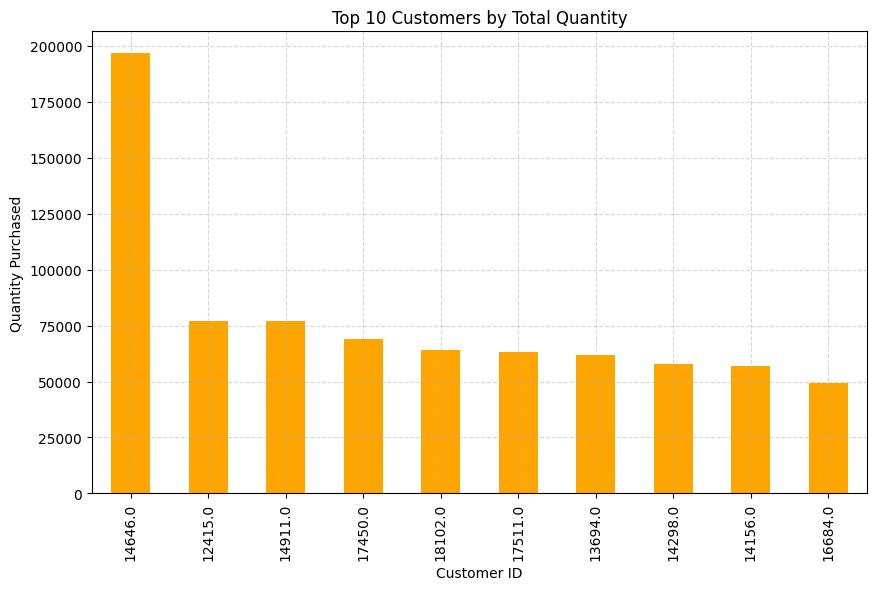

In [ ]:
if 'CustomerID' in df.columns:
    top_customers = df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10,6))
    top_customers.plot(kind='bar', color='orange')
    plt.title("Top 10 Customers by Total Quantity")
    plt.xlabel("Customer ID")
    plt.ylabel("Quantity Purchased")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

/tmp/ipython-input-40-2537418253.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Quantity'].resample('M').sum()


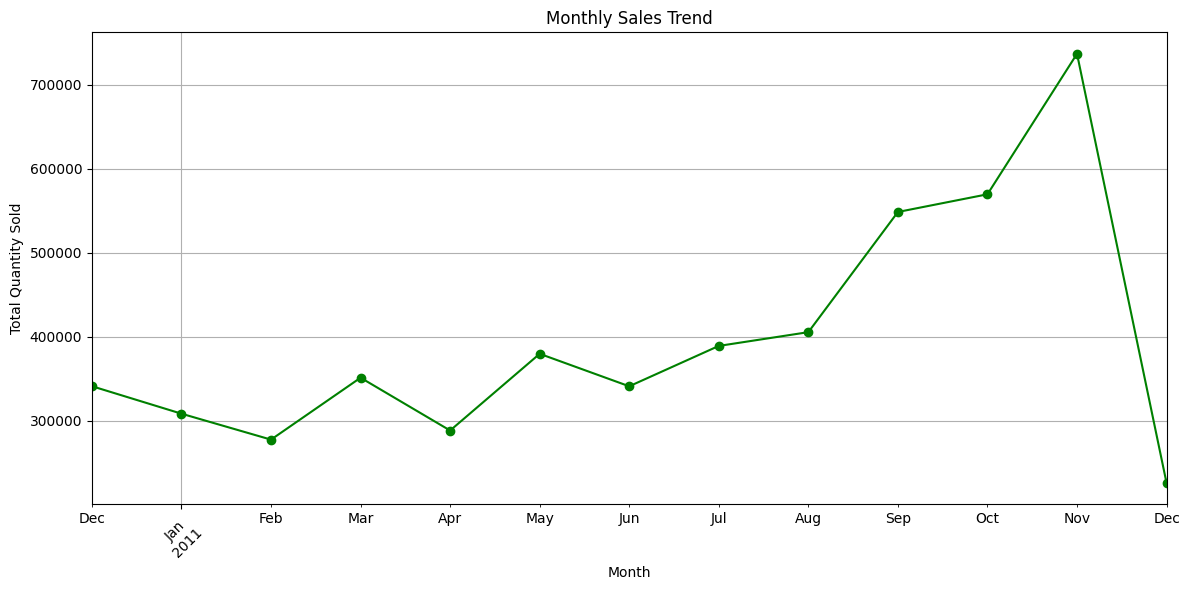

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Convert 'InvoiceDate' to datetime (if not already)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Step 2: Set 'InvoiceDate' as the index
df.set_index('InvoiceDate', inplace=True)

# Step 3: Now you can resample monthly
monthly_sales = df['Quantity'].resample('M').sum()

# Step 4: Plot the monthly trend
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

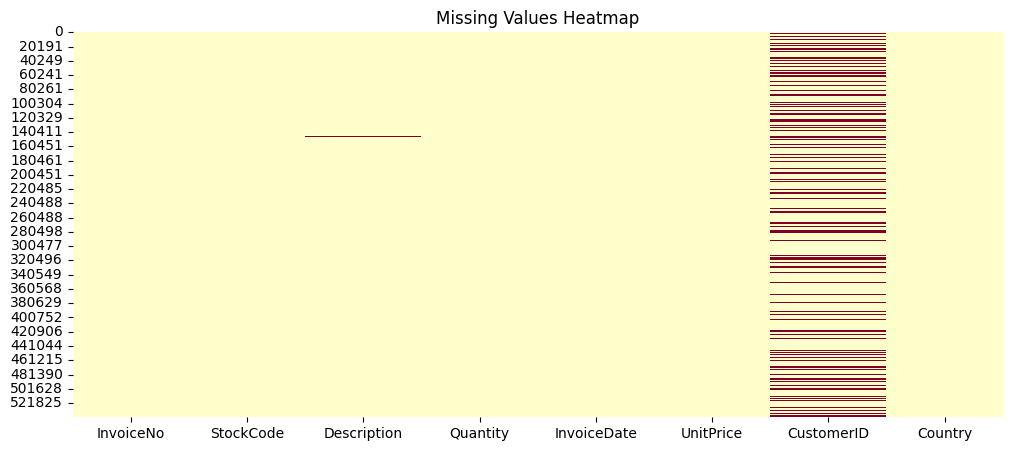

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cmap='YlOrRd', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

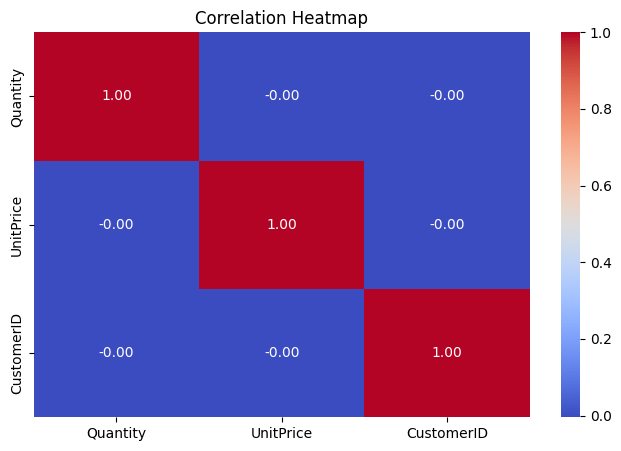

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()